## QSP Phase Angles  (Using Pennylane's QSVT Method())

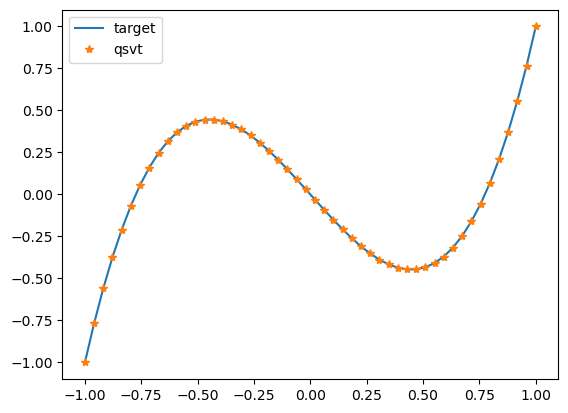

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

#Target Polynomial
def target_poly(a):
    return 0.5 * (5 * a**3 - 3 * a)


# Optimized angles from QSPPACK
angles = [-0.20409113, -0.91173829, 0.91173829, 0.20409113]


def qsvt_output(a):
    # output matrix
    out = qml.matrix(qml.qsvt(a, angles, wires=[0]))
    return out[0, 0]  # top-left entry of matrix


a_vals = np.linspace(-1, 1, 50)
qsvt = [np.real(qsvt_output(a)) for a in a_vals]  # neglect small imaginary part
target = [target_poly(a) for a in a_vals]


plt.plot(a_vals, qsvt, label="target")
plt.plot(a_vals, target, "*", label="qsvt")

plt.legend()
plt.show()


## Pennylane's BlockEncode() Method

In [4]:
# square matrix
A = [[0.1, 0.2], [0.3, 0.4]]
U1 = qml.BlockEncode(A, wires=range(2))
print("U(A):")
print(np.round(qml.matrix(U1), 2))


U(A):
[[ 0.1   0.2   0.97 -0.06]
 [ 0.3   0.4  -0.06  0.86]
 [ 0.95 -0.08 -0.1  -0.3 ]
 [-0.08  0.89 -0.2  -0.4 ]]


In [5]:
B = [[0.5, -0.5, 0.5]]
U2 = qml.BlockEncode(B, wires=range(2))
print("U(B):")
print(np.round(qml.matrix(U2), 2))


U(B):
[[ 0.5  -0.5   0.5   0.5 ]
 [ 0.83  0.17 -0.17 -0.5 ]
 [ 0.17  0.83  0.17  0.5 ]
 [-0.17  0.17  0.83 -0.5 ]]


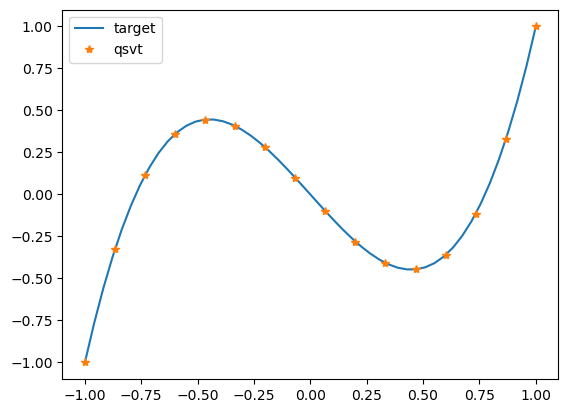

In [7]:
eigvals = np.linspace(-1, 1, 16)
A = np.diag(eigvals)  # 16-dim matrix
U_A = qml.matrix(qml.qsvt)(A, angles, wires=range(5))  # block-encoded in 5-qubit system

qsvt_A = np.real(np.diagonal(U_A))[:16]  # retrieve transformed eigenvalues

plt.plot(a_vals, target, label="target")
plt.plot(eigvals, qsvt_A, "*", label="qsvt")

plt.legend()
plt.show()


## To calculate PCPhase (QSP Angles)

In [20]:
import pennylane as qml
import numpy as np

# Define the Chebyshev polynomial coefficients
coefficients = [0.54311, 0.49505, -0.042469, 0.0048577, -6.2508e-4, 8.5757e-5, -1.1996e-5]

# Create a quantum device
dev = qml.device("default.qubit", wires=1)

# Define a function to create controlled phase shift gates for Chebyshev polynomial terms
def create_chebyshev_projectors(coefficients):
    projectors = []
    
    # Iterate through the coefficients
    for idx, coeff in enumerate(coefficients):
        # Define the controlled phase shift gate for this term
        projector = qml.PCPhase(coeff, dim=1, wires=[0])
        
        # Append the projector to the list
        projectors.append(projector)
    
    return projectors

# Create the list of Chebyshev projectors
chebyshev_projectors = create_chebyshev_projectors(coefficients)

# Print the list of Chebyshev projectors
coeff=[]

for idx, projector in enumerate(chebyshev_projectors):
    print(f"Projector {idx}: {projector}")
    coeff.append(projector)


Projector 0: PCPhase(0.54311, wires=[0])
Projector 1: PCPhase(0.49505, wires=[0])
Projector 2: PCPhase(-0.042469, wires=[0])
Projector 3: PCPhase(0.0048577, wires=[0])
Projector 4: PCPhase(-0.00062508, wires=[0])
Projector 5: PCPhase(8.5757e-05, wires=[0])
Projector 6: PCPhase(-1.1996e-05, wires=[0])
